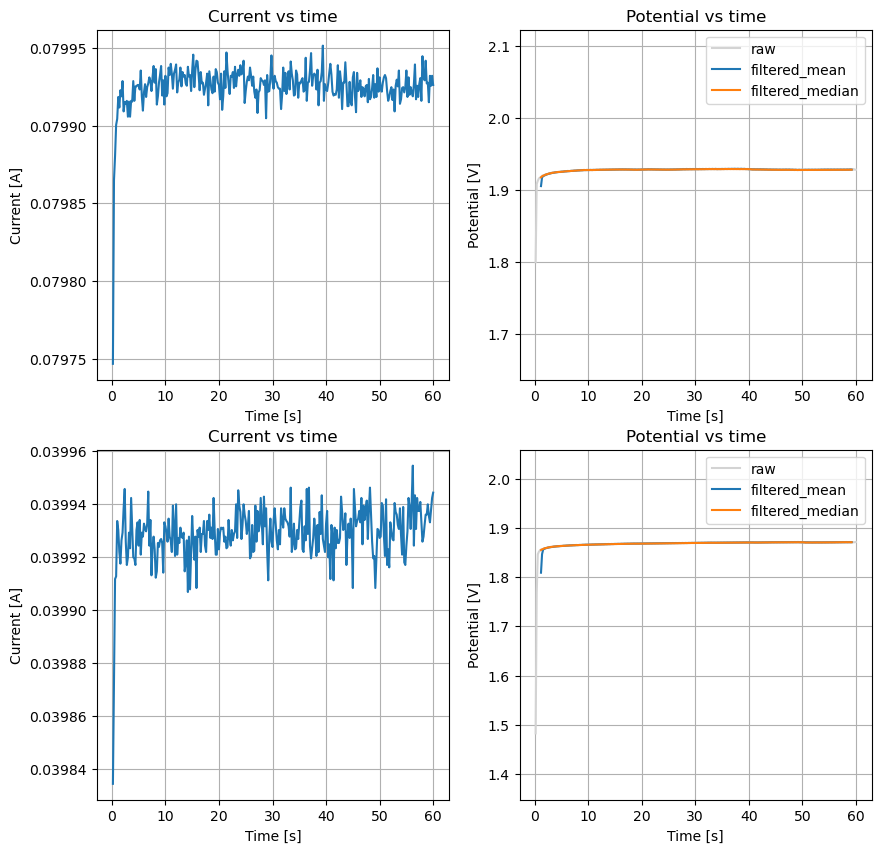

In [1]:
from ProcessingClass import Measurement
import matplotlib.pyplot as plt

A = Measurement((2024, 11,15,11,0,0), (2024, 11, 15, 13,30,0), 'experiment1 6.5M KOH')

data = A.TRScans[:2]
ws = 10


fig, ax = plt.subplots(ncols = 2, nrows = len(data), figsize = (10, 5*len(data)))
for i in range(len(data)):
    data[i]['potential_filtered_mean'] = data[i]['potential'].rolling(window=ws, center=True).mean()
    data[i]['potential_filtered_median'] = data[i]['potential'].rolling(window=ws, center=True).median()
    ax[i, 0].set_title('Current vs time')
    ax[i, 0].plot(data[i]['time'], data[i]['current'])
    ax[i, 0].grid()
    ax[i, 0].set_xlabel('Time [s]')
    ax[i, 0].set_ylabel('Current [A]')

    ax[i, 1].set_title('Potential vs time')
    ax[i, 1].plot(data[i]['time'], data[i]['potential'], label = 'raw', color = 'lightgrey')
    ax[i, 1].plot(data[i]['time'], data[i]['potential_filtered_mean'], label = 'filtered_mean')
    ax[i, 1].plot(data[i]['time'], data[i]['potential_filtered_median'], label = 'filtered_median')
    ax[i, 1].grid()
    ax[i, 1].set_xlabel('Time [s]')
    ax[i, 1].set_ylabel('Potential [V]')
    ax[i, 1].legend()
    ax[i, 1].set_ylim(min(data[i]['potential'])/1.1, max(data[i]['potential'])*1.1)